# Business case

## Domain: Finance / Banking

* The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

## 1. Problem Definition
* **Objective:** Predict whether a client will subscribe to a term deposit (binary classification).
* **Target Variable:** y (yes/no).

**Importing necessary libraries**

In [1]:
import pandas as pd  # importing pandas for analyzing, cleaning, exploring, and manipulating data
import numpy as np # for numrical and statistical calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn.model_selection import train_test_split  # importing train_test_split for spliting the data into training and testing
from imblearn.over_sampling import SMOTE  # importing SMOTE for Balancing the Data
import warnings # for ignore the warnings
warnings.filterwarnings('ignore')
import pickle   # importing pickle for saving and loading machine learning models

In [2]:
data = pd.read_csv("bank-additional-full.csv", sep=';', quotechar='"') # Data Loading

In [3]:
pd.set_option('display.max_columns', None) # for see all columns

## 2. Data Understanding
* **Explore the Data:**
  * Check the data types of each column.
  * Understand the distribution of categorical and numerical features.
  * Identify missing values or inconsistencies.

### Basic check

In [4]:
data.head() # See the data top rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.tail() # See the data last rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
data.info() # Check the data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* There are total 21 columns in data and maximum columns has object datatype
* There is 41188 rows and 21 columns

### Column Explanations
* **age:** The age of the client. Useful for demographic analysis and understanding how age affects campaign responses.

* **job:** The type of job held by the client (e.g., housemaid, services, admin, technician). This can help identify which job sectors respond better to marketing efforts.

* **marital:** Marital status of the client (e.g., married, single, divorced). This is important for understanding family dynamics and financial responsibilities.

* **education:** The highest level of education attained by the client (e.g., basic, high school, university degree). Education level may influence financial decisions and responsiveness to offers.

* **default:** Indicates whether the client has credit in default (yes/no/unknown). This is critical for assessing risk profiles in lending.

* **housing:** Indicates if the client has a housing loan (yes/no). This can impact the client’s financial stability and potential for new loans.

* **loan:** Indicates if the client has a personal loan (yes/no). Similar to housing loans, this affects financial capacity and risk assessment.

* **contact:** The type of communication used to reach the client (e.g., telephone, cellular). Understanding this can help optimize marketing strategies.

* **month:** The month when the last contact with the client was made. Seasonal trends in campaign effectiveness might be analyzed here.

* **day_of_week:** The day of the week when the last contact occurred. This can help determine optimal times for outreach.

* **duration:** The duration of the last contact in seconds. Longer conversations may indicate higher interest, which can be valuable for assessing potential success.

* **campaign:** The number of contacts performed during this campaign for this client. This helps measure engagement and persistence in marketing efforts.

* **pdays:** The number of days since the client was last contacted from a previous campaign (999 indicates the client was not previously contacted). This helps in analyzing client re-engagement strategies.

* **previous:** The number of contacts performed before this campaign. This indicates previous engagement levels.

* **poutcome:** The outcome of the previous marketing campaign (e.g., success, failure, nonexistent). This can be correlated with current campaign effectiveness.

* **emp.var.rate:** Employment variation rate (numeric). This economic indicator might reflect the client's employment stability and overall economic health.

* **cons.price.idx:** Consumer price index (numeric). This measures inflation and affects purchasing power, relevant for economic analysis.

* __cons.conf.idx:__ Consumer confidence index (numeric). This reflects consumer confidence and can influence spending behaviors.

* __euribor3m:__ The 3-month Euribor rate (numeric). This is relevant for interest rates affecting loans and investments.

* __nr.employed:__ The number of employees (numeric). This can be an indicator of economic health in the region and its effect on client behavior.

* __y:__ The target variable indicating if the client subscribed to a term deposit (yes/no). This is the primary outcome of interest for the campaign analysis.

In [7]:
data.isnull().sum() # Identify missing values or inconsistencies.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

* There are no null values in data

In [8]:
data.describe() # Here we can can see the statistical information of numerical columns

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### **Demographic Insights:**
* **Age:** The average age is around 40, with a range from 17 to 98. This indicates a broad age distribution, which may affect financial decisions and responses to marketing strategies.

##### **Campaign Insights:**
* **Duration:** The average duration of calls is approximately 258 seconds, with a wide standard deviation (about 259 seconds). This suggests variability in the length of interactions, possibly correlating with engagement levels or customer interest.

* **Campaign Calls:** The mean number of campaign calls per individual is around 2.57, with a maximum of 56 calls. This could indicate a proactive outreach strategy, but the distribution suggests that most individuals receive relatively few calls.

* **Previous Contacts:** The previous column has an average of 0.17, indicating that most individuals have not been contacted previously. This may suggest a strategy focused on new leads rather than follow-ups.

##### **Economic Indicators:**
* **Economic Variables:** Employment Variation Rate: The average employment variation rate is low (0.17), indicating relatively stable employment conditions in the observed period.

* **Consumer Price Index:** The mean index is around 93.58, suggesting moderate consumer price conditions. The low standard deviation indicates stability in consumer prices among the observed individuals.

* **Consumer Confidence Index:** The average is -40.50, which indicates negative consumer confidence. This could correlate with hesitance to accept financial products or services.

* **Euribor Rate:** The average Euribor rate is about 3.62, which may influence interest rates on loans and savings, affecting financial decisions.

* **Employment:** The average number of employees (in thousands) is around 5167, with a narrow range indicating a stable employment situation in the region.
##### **Behavioral Insights:**
* **Pdays:** The average value for pdays is around 962.48, with many values at 999, indicating that a significant number of individuals have never been contacted before (999 typically denotes non-applicable or no prior contact). This reinforces the previous observation of a new outreach strategy.

##### **Overall Implications:**
**The data reflects a mature demographic likely experiencing stable economic conditions, yet with notable negative consumer confidence. The campaign appears to prioritize initial outreach with relatively low previous contact rates, suggesting opportunities for deeper engagement strategies. The variability in call duration may indicate differing levels of customer interest, pointing to the potential for more tailored communication strategies based on customer profiles. Overall, there may be a need to align financial offerings with the economic realities and confidence levels of this demographic to improve acceptance rates.**

In [9]:
data.describe(include="O") # Here we can can see the statistical information of categorical columns

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


##### **Job Insights:**
* **Job Distribution:** There are 12 unique job categories, with "admin." being the most common (10,422 occurrences). This suggests a significant representation of administrative roles in the dataset.

##### **Marital Status:**
* **Marital Status:** The majority of individuals are "married" (24,928 occurrences), which may indicate a demographic that values financial stability, potentially influencing their responses to financial products.

##### **Education Level:**
* **Education Levels:** The most common educational attainment is "university.degree" (12,168 occurrences). This suggests that a substantial portion of the population is well-educated, which may correlate with financial literacy and product acceptance.

##### **Financial Product Indicators:**
* **Defaults:** Most individuals have no default history (32,588 occurrences), indicating a generally good creditworthiness among this demographic.

* **Housing and Loan:** A significant number have housing loans (21,576 occurrences) but fewer have other loans (33,950 occurrences). This could indicate a preference or necessity for housing loans, possibly reflecting home ownership trends.

##### **Contact Method:**
* **Contact Method:** The predominant contact method is "cellular" (26,144 occurrences), which may suggest effective outreach strategies targeting mobile users.

##### **Month and Day of Week:**
* **Contact Timing:** "May" is the most common month for contact (13,769 occurrences), while "Thursday" is the most frequent day of the week for calls (8,623 occurrences). This could inform future campaign scheduling to maximize engagement.

##### **Previous Outcome:**
* **Previous Contact Outcomes:** The "poutcome" field shows that most individuals have a "nonexistent" previous outcome (35,563 occurrences). This suggests that the current dataset primarily includes new contacts rather than follow-ups from prior engagements.
##### **Response Variable (y):**
* **Response to Campaign:** The majority of individuals responded with "no" (36,548 occurrences) to the campaign, indicating a need for strategies to enhance acceptance rates. Understanding the characteristics of those who said "yes" could provide insights into improving outreach effectiveness.
##### **Overall Implications:** 
**The dataset reflects a demographic that is predominantly married, well-educated, and generally creditworthy, with a significant reliance on mobile communication. The high rate of "no" responses to the campaign indicates potential gaps in matching product offerings with customer needs or a need for more effective persuasion strategies. Campaign strategies could be optimized by targeting specific demographic segments that exhibit higher acceptance rates and by considering the timing of contacts.**

## 3. Data Preprocessing
* **Handle Missing Values:**
  * Determine the percentage of missing values in each feature.
  * Decide on imputation strategies (fill with mode for categorical, mean/median for numerical).

In [10]:
data.isnull().sum() # Identify missing values or inconsistencies.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

* __There are no null values in any columns.__

## Data Transformation:
* Encode categorical variables.

In [11]:
data.info() # Check categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* __job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y__ are categorical columns we need to transform into numerical.
* __age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed__ we are nothing to do anything on these columns.

* __One-Hot Encoding columns:__ job, marital, default, housing, loan
* __Ordinal encoding columns:__ education, month, day_of_week
* __Label encoding columns:__ contact, y, poutcome

* __Apply One-Hot Encoding__

In [12]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder # Import Library for encoding

* Creating a separate dataset of all columns that we have to apply One-hot encoder

In [13]:
job_data = data.job # Creating separate dataset of job column
marital_data = data.marital # Creating separate dataset of marital column
default_data = data.default # Creating separate dataset of default column
housing_data = data.housing # Creating separate dataset of housing column
loan_data = data.loan # Creating separate dataset of loan column

In [14]:
job_one_hot = pd.get_dummies(job_data, columns=['job'], prefix='job',dtype=int) # Creating separate dataset of job column with all unique values
marital_one_hot = pd.get_dummies(marital_data, columns=['marital'], prefix='marital',dtype=int) # Creating separate dataset of marital column with all unique values
default_one_hot = pd.get_dummies(default_data, columns=['default'], prefix='default',dtype=int) # Creating separate dataset of default column with all unique values
housing_one_hot = pd.get_dummies(housing_data, columns=['housing'], prefix='housing',dtype=int) # Creating separate dataset of housing column with all unique values
loan_one_hot = pd.get_dummies(loan_data, columns=['loan'], prefix='loan',dtype=int) # Creating separate dataset of loan column with all unique values

In [15]:
data = pd.concat([data,job_one_hot, marital_one_hot,default_one_hot,housing_one_hot,loan_one_hot], axis=1) # # Concatenate the original DataFrame

In [16]:
data.drop(["job","marital","default","housing","loan"],axis=1,inplace=True) # drop those dummy variables

* __Apply Ordinal Encoding__

In [17]:
# Ordinal Encoding
ordinal_encoders = {'education': ['illiterate','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree','unknown'],
                    'month': ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                    'day_of_week': ['mon', 'tue', 'wed', 'thu', 'fri']} # createing distnory for Ordinal Encoding 

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder() # save the Ordinal Encoder
for column, categories in ordinal_encoders.items(): # creating a for loop
    encoder = OrdinalEncoder(categories=[categories],dtype=int)  # Set the categories for the encoder
    data[column] = encoder.fit_transform(data[[column]]) # Transform the categorical columns into numerical columns

* __Apply Label Encoding__

In [18]:
# Label Encoding
label_encoder = LabelEncoder() # save the Label Encoder

label_columns = ['contact', 'y', 'poutcome'] # creating a list for encoding
for col in label_columns: # creating a for loop
    data[col] = label_encoder.fit_transform(data[col]) # Transform the categorical columns into numerical columns

### 4. Exploratory Data Analysis (EDA)
#### **Univariate Analysis:**
  * Visualize distributions of features.

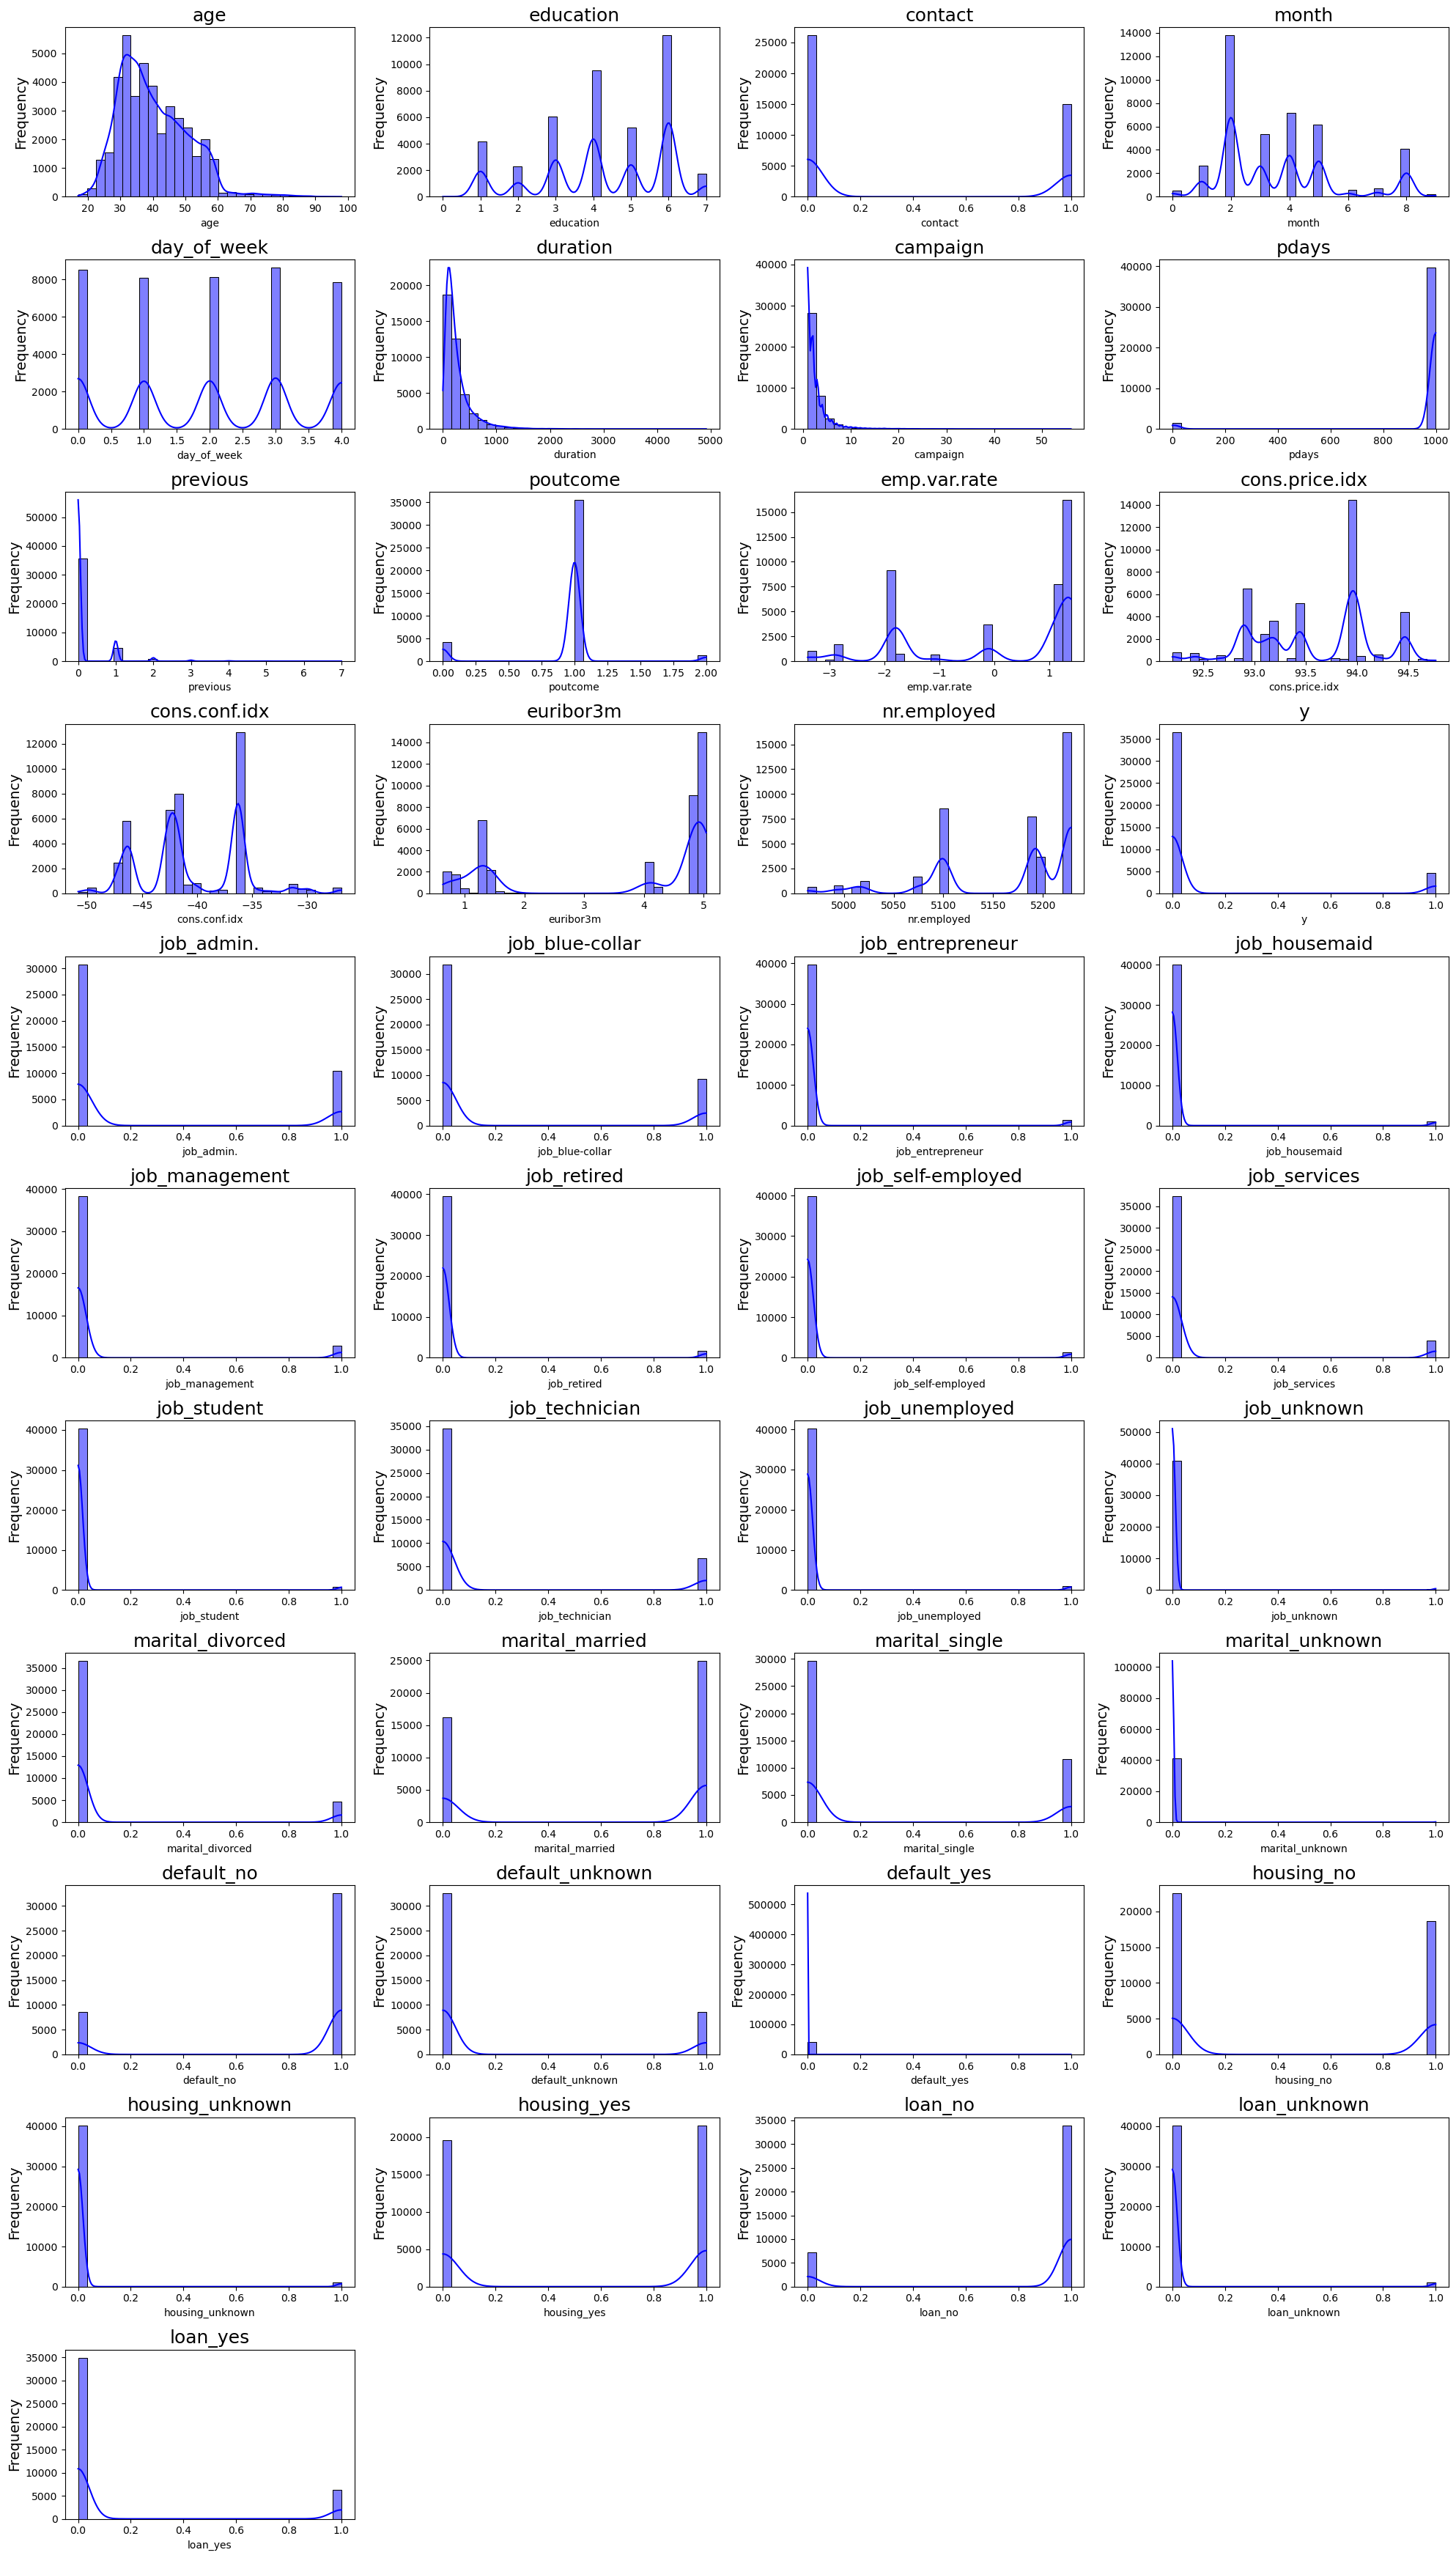

In [19]:
plt.figure(figsize=(20, 35))  # figure size

# Set the number of features and determine the layout
num_features = len(data.columns) # calculate the number of columns
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(data.columns, start=1):
    plt.subplot(num_rows, num_cols, plot_num) # here we set the sub plot 
    sns.histplot(data[feature], kde=True, bins=30, color='blue')  # Using sns.histplot with kde
    plt.title(feature, fontsize=18) # set the size of title
    plt.ylabel('Frequency', fontsize=14) # set the size of y

# Show all plots at once
plt.tight_layout()  # This helps in adjusting subplots to fit into the figure area.
plt.show()

**Demographic Features**
* Age: The distribution appears skewed to the right, suggesting a larger proportion of older individuals in the dataset.
* Education: The histogram shows a relatively uniform distribution, indicating a diverse range of educational backgrounds.
* Contact: A majority of contacts seem to occur within the first few months.

**Campaign and Contact Features**

* Month: The distribution is relatively uniform, with no significant peaks or valleys.
* Day of Week: There seems to be a slight preference for contacting individuals on weekdays.
* Duration: The distribution is skewed to the right, indicating that a significant portion of calls are relatively short.
* Campaign: The histogram shows a clear rightward skew, suggesting that a large number of individuals have been contacted multiple times.
* Pdays: The distribution is heavily skewed to the right, with a large number of individuals having no previous contact.

**Outcome and Economic Indicators**

* Previous: The distribution is heavily skewed to the right, indicating that most individuals have not been contacted previously.
* Poutcome: The distribution shows a clear preference for "unknown" outcomes, suggesting limited previous contact information.
* Emp.var.rate: The distribution is skewed to the left, indicating a general downward trend in the employment variation rate.
* Cons.price.idx: The distribution is relatively uniform, with a slight rightward skew.
* Cons.conf.idx: The distribution is skewed to the left, suggesting a general improvement in consumer confidence.
* Euribor3m: The distribution is skewed to the left, indicating a general decrease in the Euribor 3-month rate.
* Nr.employed: The distribution is skewed to the left, suggesting a general increase in the number of employed individuals.

**Job Categories**

* Job-Admin: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.
* Job-Blue-Collar: The distribution shows a clear rightward skew, suggesting a larger proportion of individuals in this category.
* Job-Entrepreneur: The distribution is heavily skewed to the right, with a large number of individuals in this category.
* Job-Housemaid: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.
* Job-Management: The distribution is skewed to the right, suggesting a relatively small number of individuals in this category.
* Job-Retired: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.
* Job-Self-Employed: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.
* Job-Services: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.
* Job-Student: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.
* Job-Technician: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.
* Job-Unemployed: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.
* Job-Unknown: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.

**Marital Status**

* Marital-Divorced: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.
* Marital-Married: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.
* Marital-Single: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.
* Marital-Unknown: The distribution is skewed to the right, indicating a relatively small number of individuals in this category.

**Default Status**

* Default-No: The distribution is heavily skewed to the right, indicating a large number of individuals who have not defaulted on their loans.
* Default-Unknown: The distribution is skewed to the right, indicating a relatively small number of individuals with unknown default status.
* Default-Yes: The distribution is skewed to the right, indicating a relatively small number of individuals who have defaulted on their loans.

**Housing Status**

* Housing-No: The distribution is skewed to the right, indicating a relatively small number of individuals who do not own a house.
* Housing-Unknown: The distribution is skewed to the right, indicating a relatively small number of individuals with unknown housing status.
* Housing-Yes: The distribution is skewed to the right, indicating a relatively small number of individuals who own a house.

**Loan Status**

* Loan-No: The distribution is skewed to the right, indicating a relatively small number of individuals who did not apply for a loan.
* Loan-Unknown: The distribution is skewed to the right, indicating a relatively small number of individuals with unknown loan status.
* Loan-Yes: The distribution is skewed to the right, indicating a relatively small number of individuals who applied for a loan.

#### **Bivariate Analysis:**
  * Explore relationships between features and the target variable (e.g., correlation heatmaps, groupby summaries).
  * Use visualizations to check for patterns (e.g., count plots, scatter plots).

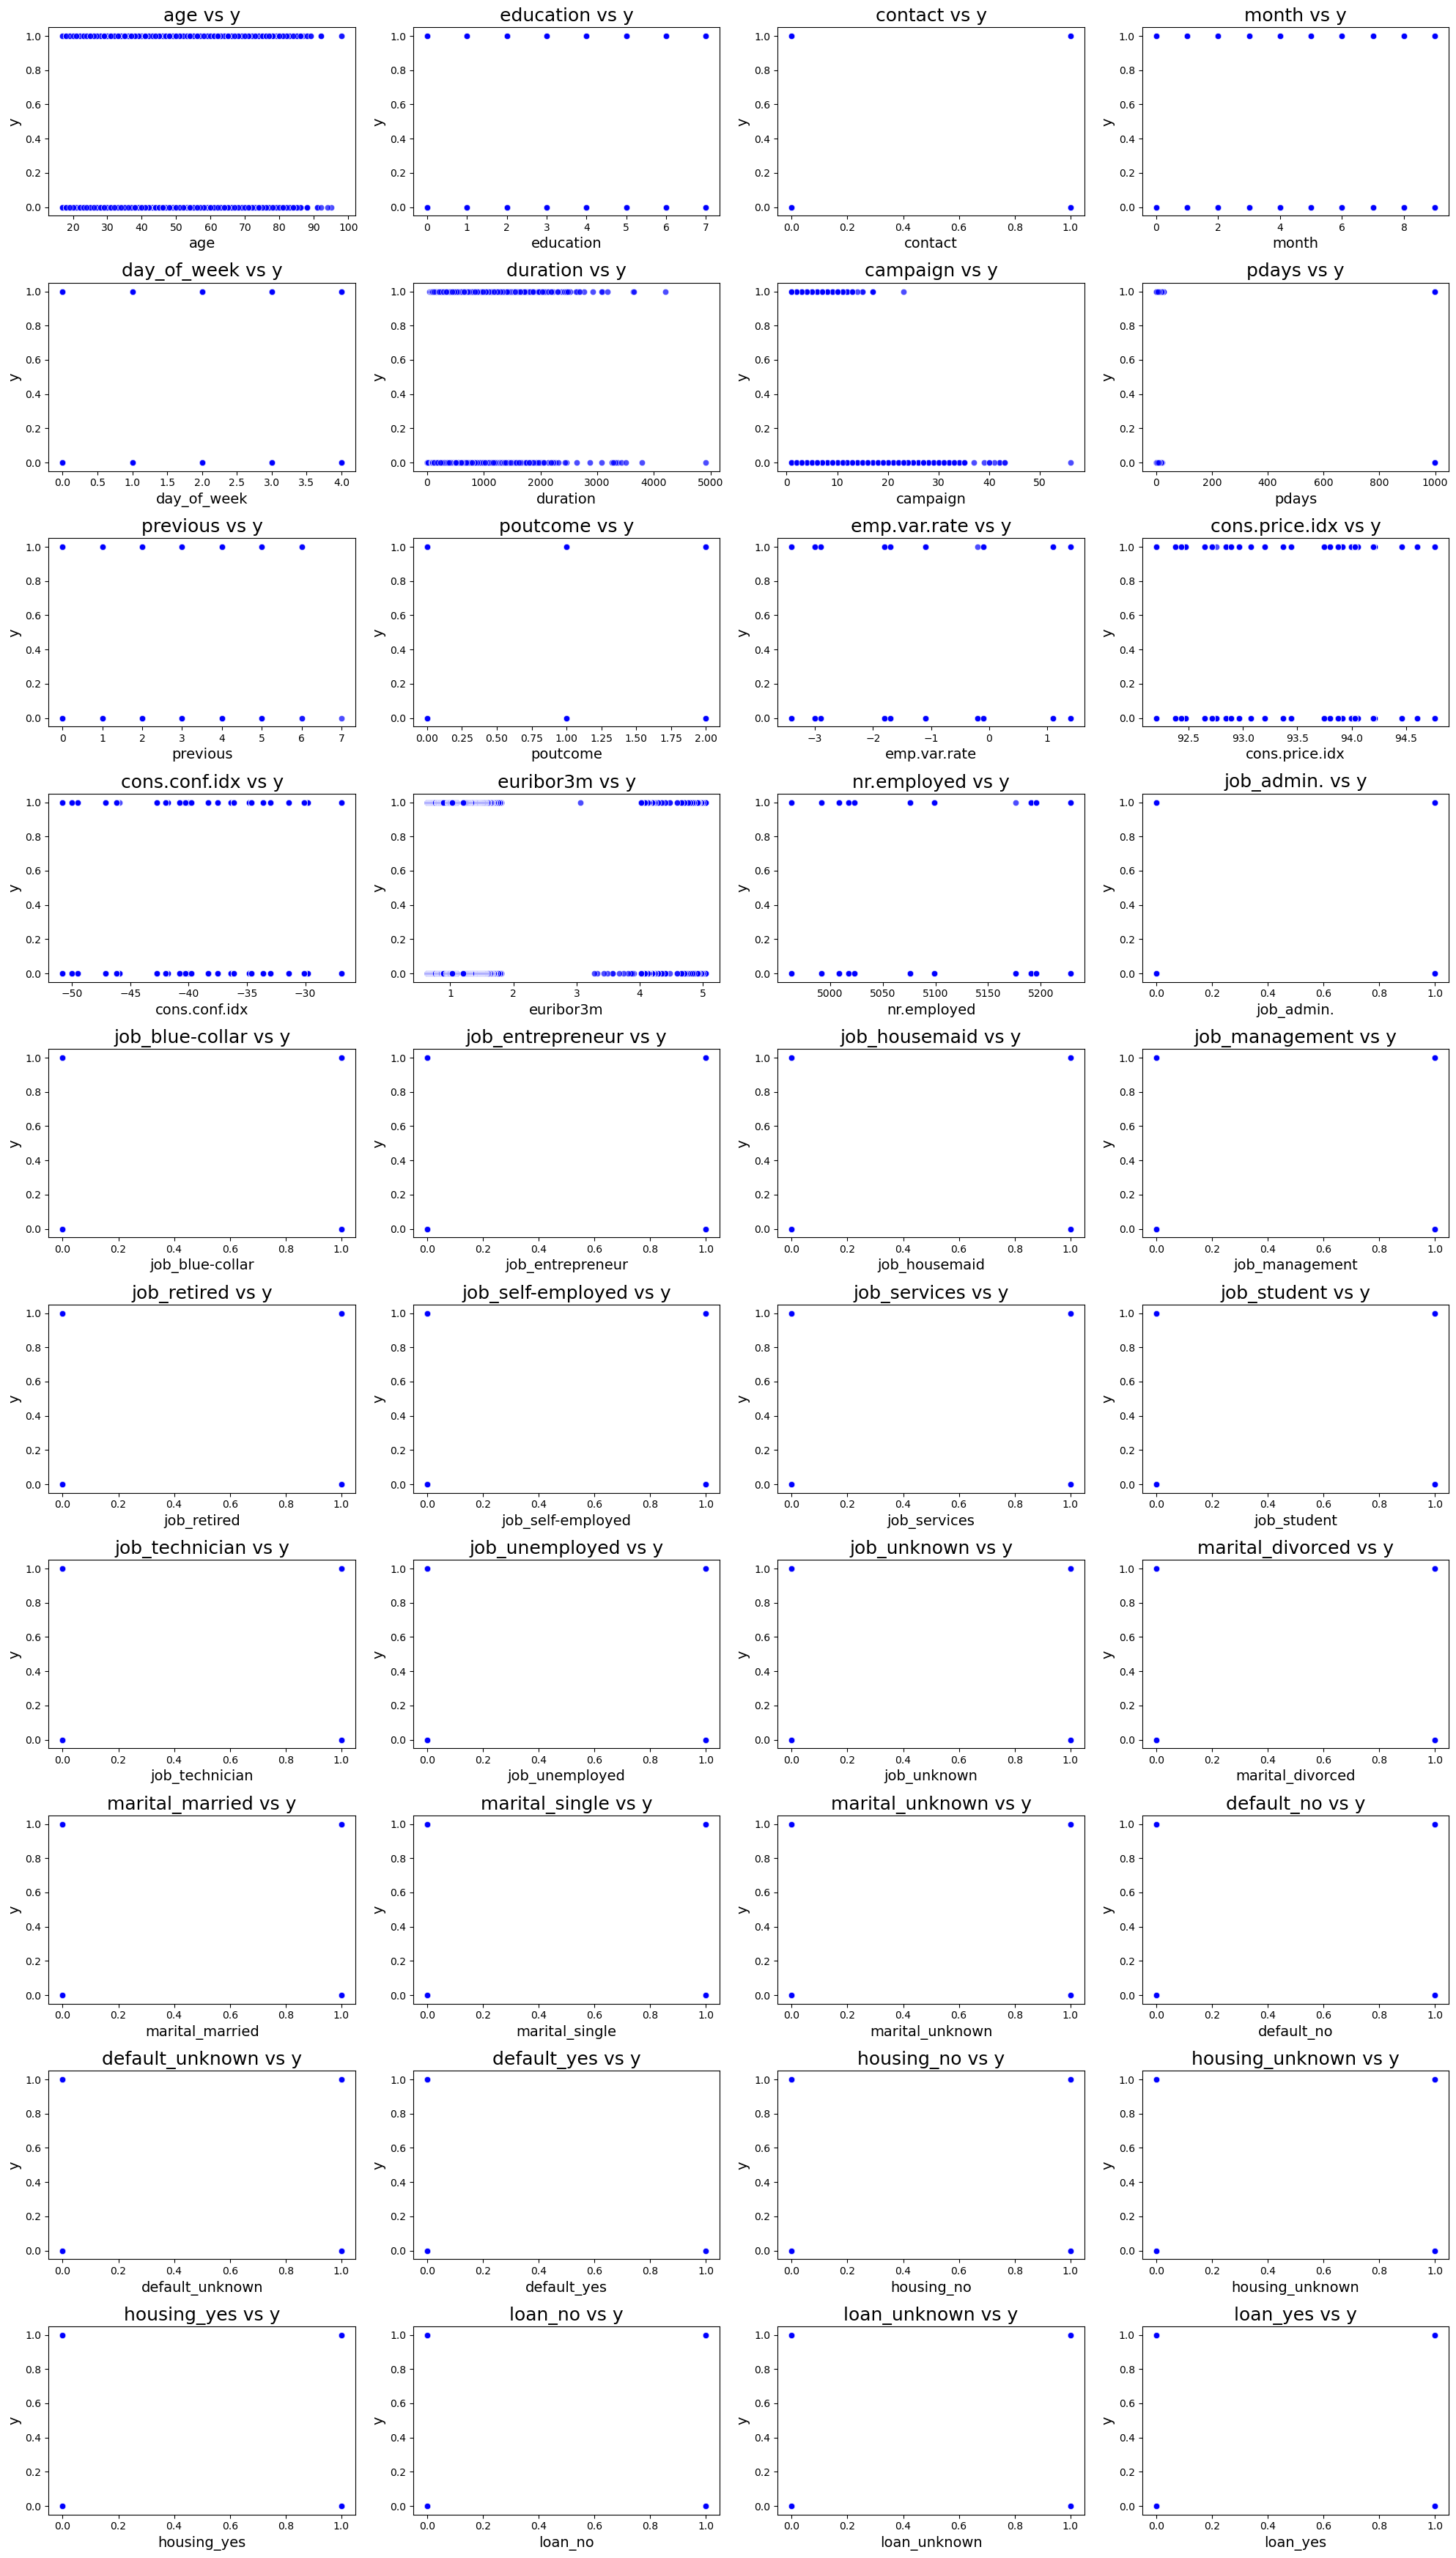

In [20]:
# Specify the target variable as a string
target_variable = 'y'  # Use the name of the target variable as a string
features_x = data.drop(columns=[target_variable])  # Drop the target variable

# Get the list of features excluding the target variable
features = features_x.columns.tolist()  # List of feature names

plt.figure(figsize=(20, 35))  # Increase height for better visibility

# Set the number of features and determine the layout
num_features = len(features)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(features, start=1):
    plt.subplot(num_rows, num_cols, plot_num)
    sns.scatterplot(data=data, x=feature, y=target_variable, color='blue', alpha=0.7)
    plt.title(f'{feature} vs {target_variable}', fontsize=18)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel(target_variable, fontsize=14)

# Show all plots at once
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

**No Clear Linear Relationships**

* Most scatter plots: The points are scattered without a clear linear pattern, suggesting that there might be non-linear relationships or no strong direct relationships between these features and the target variable.

**Potential Outliers**

* Some scatter plots: There are visible outliers, which might influence the overall relationship and require further investigation.

## Feature Engineering:

### Data Preprocessing

* see the outliers in all features

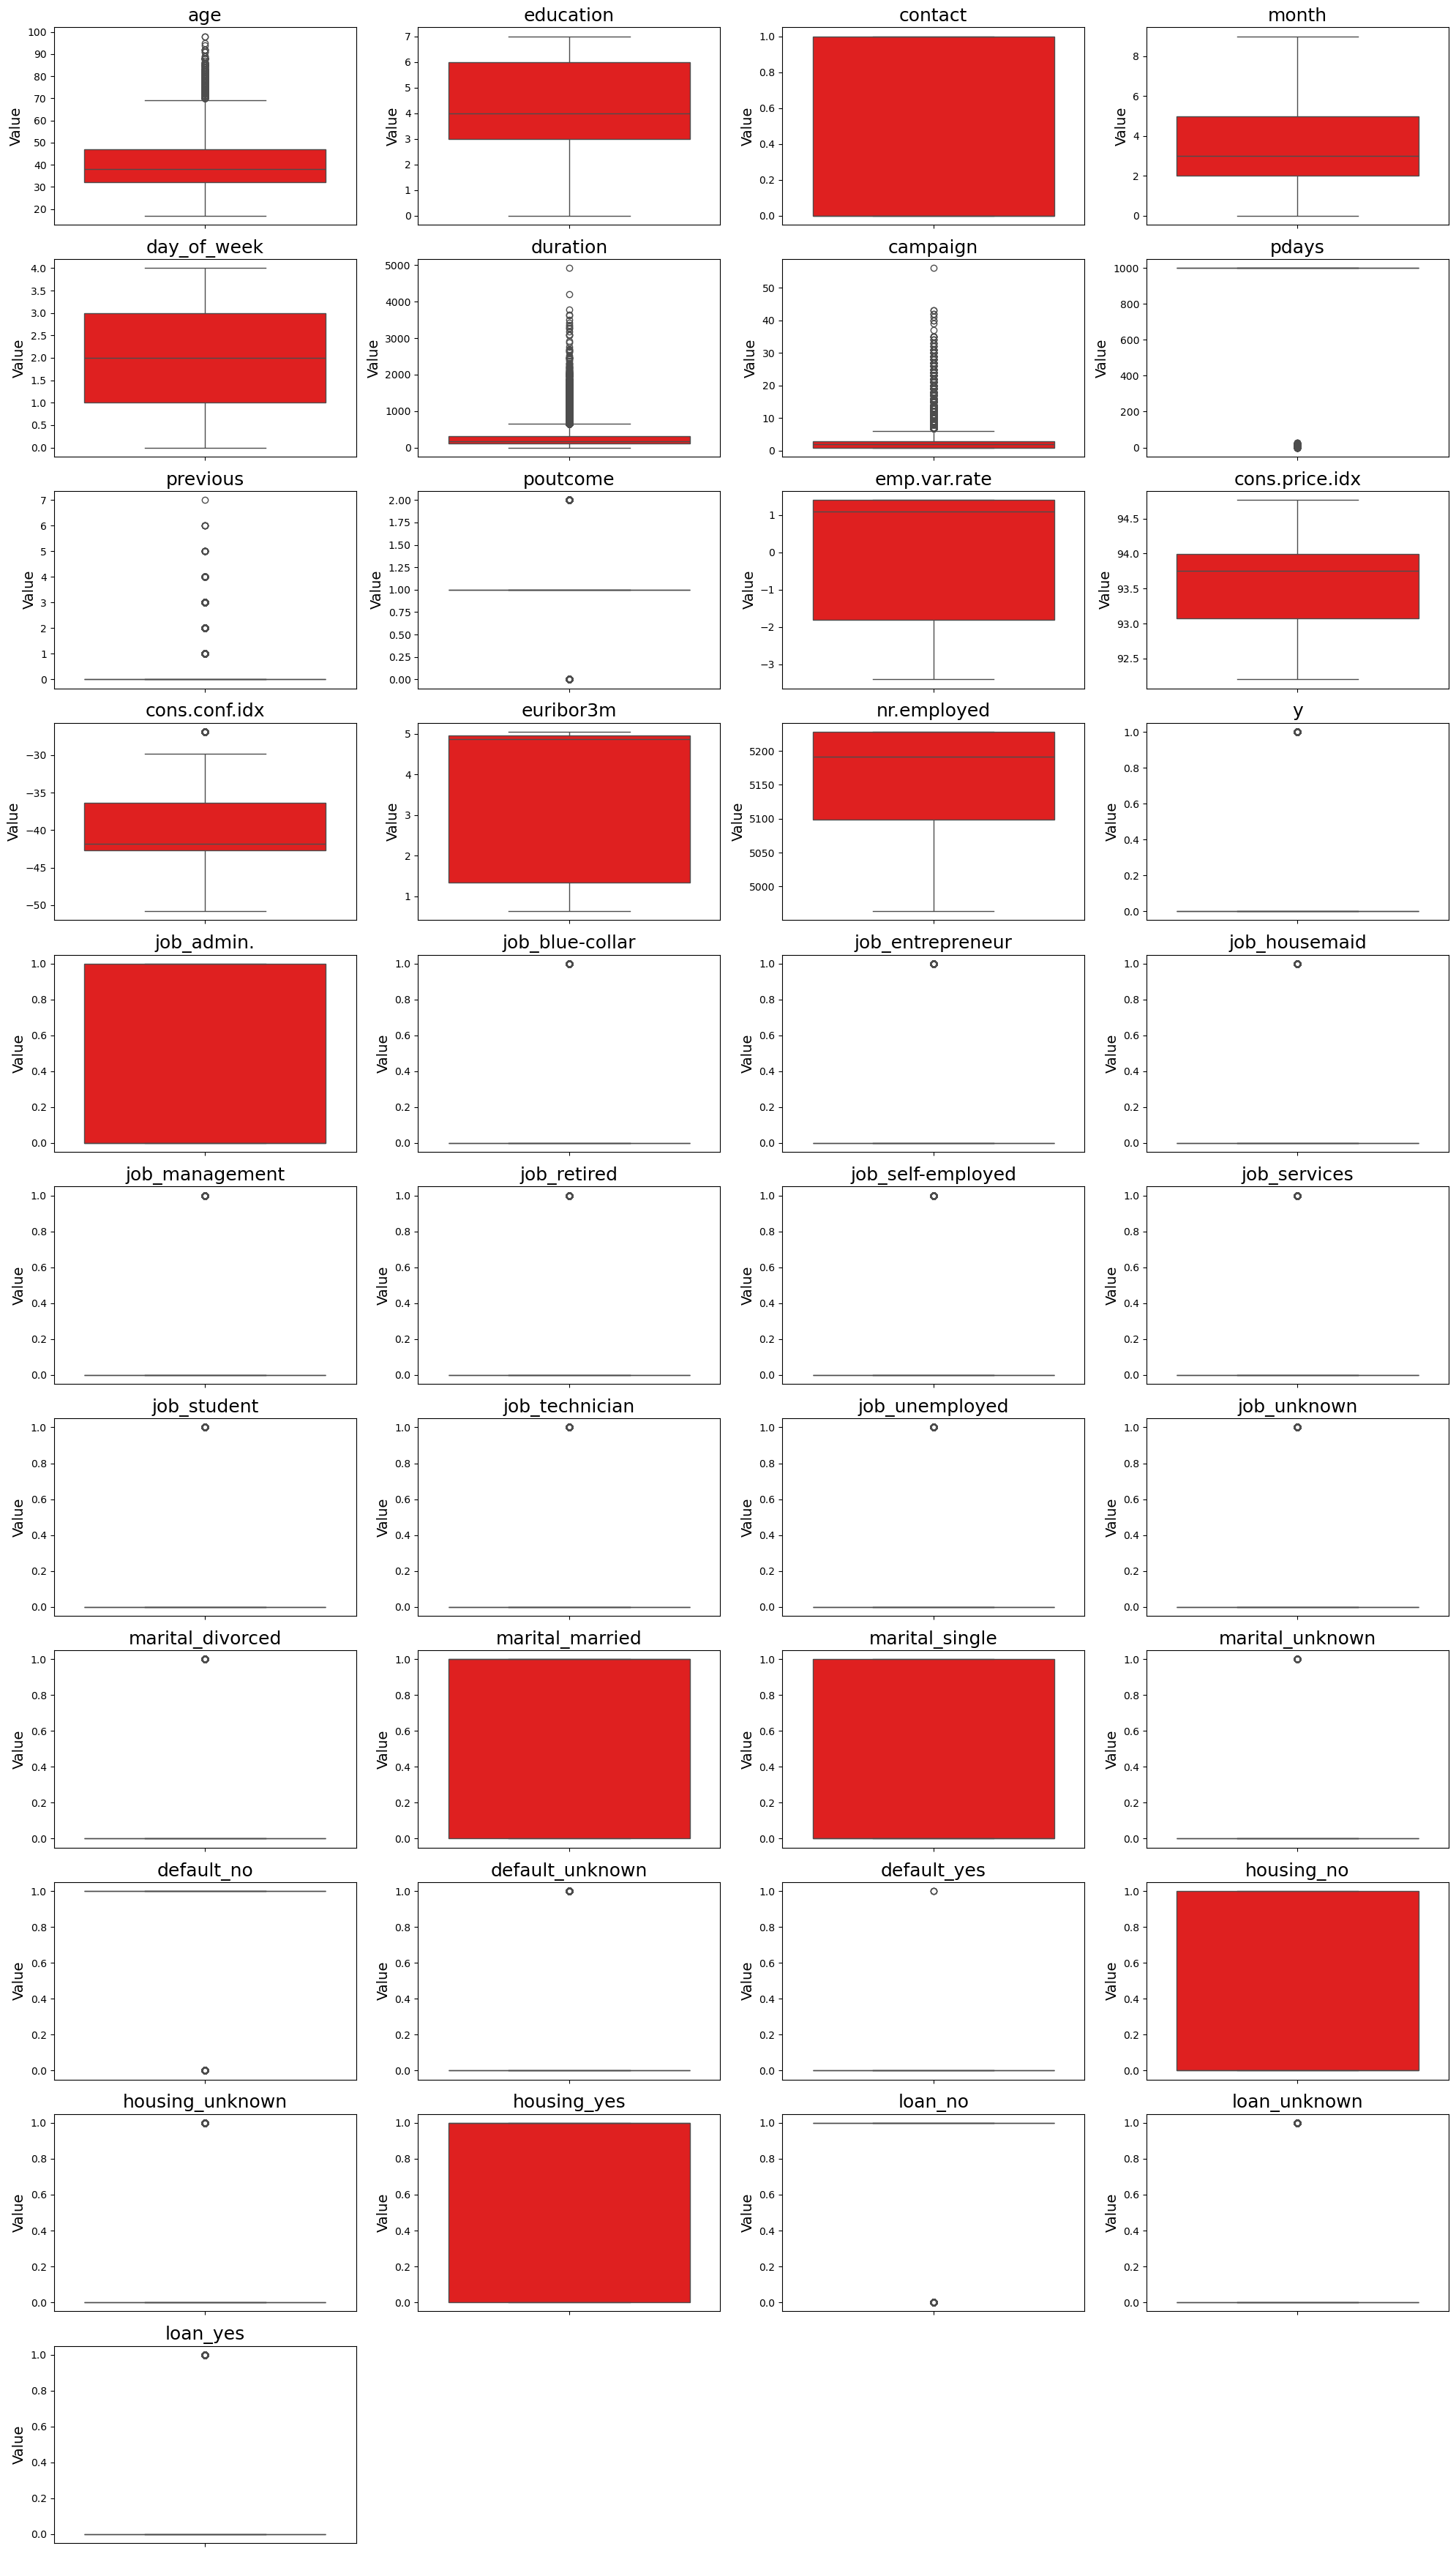

In [21]:
plt.figure(figsize=(20, 35))  # Adjust the figure size as needed

# Set the number of features and determine the layout
num_features = len(data.columns)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(data.columns, start=1):
    plt.subplot(num_rows, num_cols, plot_num)
    sns.boxplot(y=data[feature], color='red')  # Use 'y' parameter for vertical box plots
    plt.title(feature, fontsize=18)
    plt.ylabel('Value', fontsize=14)

# Show all plots at once
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

* __age, duration, campaign, pdays, previous, poutcome, cons.conf.idx, job_blue-collar, job_entrepreneur, job_housemaid, job_management, job_retired, job_self-employed, job_services, job_student, job_technician, job_unemployed, job_unknown, marital_divorced, marital_unknown, default_no, default_unknown, default_yes, housing_unknown, loan_no, loan_unknown, loan_yes__ these columns has outliers. 

#### **Handle the outliers** 

* **Age**

In [22]:
# First we have know Q1 and Q3 let's find it.

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
age_Q1 = data['age'].quantile(0.25)
age_Q3 = data['age'].quantile(0.75)

# Second we have to Calculate the Interquartile Range (IQR)

age_IQR = age_Q3 - age_Q1

#Third we have to # Define the lower and upper bounds for outliers

age_lower_bound = age_Q1 - 1.5 * age_IQR
age_upper_bound = age_Q3 + 1.5 * age_IQR

data.loc[data["age"] > age_upper_bound,"age"] = 31# these are outliers of age

* **duration**

In [23]:
# First we have know Q1 and Q3 let's find it.

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
duration_Q1 = data['duration'].quantile(0.25)
duration_Q3 = data['duration'].quantile(0.75)

# Second we have to Calculate the Interquartile Range (IQR)

duration_IQR = duration_Q3 - duration_Q1

#Third we have to # Define the lower and upper bounds for outliers

duration_lower_bound = duration_Q1 - 1.5 * duration_IQR
duration_upper_bound = duration_Q3 + 1.5 * duration_IQR

data.loc[data["duration"] > duration_upper_bound,"duration"] = 85 # these are outliers of duration

* **campaign**

In [24]:
# First we have know Q1 and Q3 let's find it.

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
campaign_Q1 = data.campaign.quantile(0.25)
campaign_Q3 = data.campaign.quantile(0.75)

# Second we have to Calculate the Interquartile Range (IQR)

campaign_IQR = campaign_Q3 - campaign_Q1

#Third we have to # Define the lower and upper bounds for outliers
campaign_lower_bound = campaign_Q3 + 1.5 * campaign_IQR
campaign_upper_bound = campaign_Q1 - 1.5 * campaign_IQR

data.loc[(data["campaign"] >= campaign_lower_bound) | (data["campaign"] <= campaign_upper_bound),"campaign"] = 1 # these are outliers of campaign

* **pdays**

In [25]:
data.loc[data["pdays"] == 0, "pdays"] = 999 # Handled the outliers

* **previous**

In [26]:
data.loc[data["previous"] >= 1.2, "previous"] = 0 # Handled the outliers

* **poutcome**

In [27]:
data.loc[(data["poutcome"] == 0 ) | (data["poutcome"] == 2), "poutcome"] = 1 # Handled the outliers

* **cons.conf.idx**

In [28]:
data.loc[data["cons.conf.idx"] > -30 , "cons.conf.idx"] = data["cons.conf.idx"].median() # Handled the outliers

* **job**

In [29]:
data.loc[data["job_blue-collar"] == 1, "job_blue-collar"] = 0 # Handled the job_blue-collar column outliers
data.loc[data["job_entrepreneur"] == 1, "job_entrepreneur"] = 0 # Handled the job_entrepreneur column outliers
data.loc[data["job_housemaid"] == 1, "job_housemaid"] = 0 # Handled the job_housemaid column outliers
data.loc[data["job_management"] == 1, "job_management"] = 0 # Handled the job_management column outliers
data.loc[data["job_retired"] == 1, "job_retired"] = 0 # Handled the job_retired column outliers
data.loc[data["job_self-employed"] == 1, "job_self-employed"] = 0 # Handled the job_self-employed column outliers
data.loc[data["job_services"] == 1, "job_services"] = 0 # Handled the job_services column outliers
data.loc[data["job_student"] == 1, "job_student"] = 0 # Handled the job_student column outliers
data.loc[data["job_technician"] == 1, "job_technician"] = 0 # Handled the job_technician column outliers
data.loc[data["job_unemployed"] == 1, "job_unemployed"] = 0 # Handled the job_unemployed column outliers
data.loc[data["job_unknown"] == 1, "job_unknown"] = 0 # Handled the job_unknown column outliers

* **marital**

In [30]:
data.loc[data["marital_divorced"] == 1, "marital_divorced"] = 0 # Handled the marital_divorced column outliers
data.loc[data["marital_unknown"] == 1, "marital_unknown"] = 0 # Handled the marital_unknown column outliers

* **default**

In [31]:
data.loc[data["default_no"] == 0, "default_no"] = 1 # Handled the default_no column outliers
data.loc[data["default_unknown"] == 1, "default_unknown"] = 0 # Handled the default_unknown column outliers
data.loc[data["default_yes"] == 1, "default_yes"] = 0 # Handled the default_yes column outliers

* **housing_unknown**

In [32]:
data.loc[data["housing_unknown"] == 1, "housing_unknown"] = 0 # Handled the default_yes column outliers

* **loan**

In [33]:
data.loc[data["loan_no"] == 0, "loan_no"] = 1 # Handled the loan_no column outliers
data.loc[data["loan_unknown"] == 1, "loan_unknown"] = 0 # Handled the loan_unknown column outliers
data.loc[data["loan_yes"] == 1, "loan_yes"] = 0 # Handled the loan_yes column outliers

* __Here we handled the all outliers of all columns__

## 5. Feature Selection
* **Identify Important Features:**
  * Use correlation analysis and feature importance metrics .

In [34]:
data.corr() # Check the correlation of all features

,age,education,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
age,1.000000,-0.107780,0.037309,0.062122,-0.019741,0.003297,0.006625,0.012972,-0.021575,NaN,0.083457,0.043179,0.093199,0.096337,0.083289,-0.029500,-0.080972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.285932,-0.413915,NaN,NaN,NaN,NaN,0.004214,NaN,-0.004390,NaN,NaN,NaN
education,-0.107780,1.000000,-0.102496,0.117356,0.005706,-0.020008,0.000821,-0.044677,0.017534,NaN,-0.046600,-0.079995,0.066721,-0.039545,-0.043681,0.055877,0.284088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.155064,0.161352,NaN,NaN,NaN,NaN,-0.014239,NaN,0.017058,NaN,NaN,NaN
contact,0.037309,-0.102496,1.000000,-0.324315,0.019583,-0.025584,0.025869,0.117872,-0.216106,NaN,0.393584,0.591474,0.297812,0.399773,0.269155,-0.144773,-0.059227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063648,-0.071159,NaN,NaN,NaN,NaN,0.077937,NaN,-0.084472,NaN,NaN,NaN
month,0.062122,0.117356,-0.324315,1.000000,-0.006959,-0.044172,-0.031420,-0.079184,0.017111,NaN,0.058874,-0.150350,0.199872,0.163411,0.132697,0.037187,0.048007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010255,-0.017394,NaN,NaN,NaN,NaN,-0.029715,NaN,0.033252,NaN,NaN,NaN
day_of_week,-0.019741,0.005706,0.019583,-0.006959,1.000000,-0.013554,-0.024659,0.007103,0.009216,NaN,-0.004401,-0.004586,-0.006571,-0.005552,-0.000734,0.010051,0.005294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001971,0.010839,NaN,NaN,NaN,NaN,0.008510,NaN,-0.009280,NaN,NaN,NaN
duration,0.003297,-0.020008,-0.025584,-0.044172,-0.013554,1.000000,-0.014462,-0.068127,0.019497,NaN,-0.057506,-0.007107,0.004431,-0.063685,-0.082747,0.143248,-0.008110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003680,0.002165,NaN,NaN,NaN,NaN,0.009645,NaN,-0.008098,NaN,NaN,NaN
campaign,0.006625,0.000821,0.025869,-0.031420,-0.024659,-0.014462,1.000000,0.032006,-0.043787,NaN,0.067519,0.049871,0.005500,0.056402,0.061988,-0.029416,0.004771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002716,-0.002429,NaN,NaN,NaN,NaN,0.005898,NaN,-0.005451,NaN,NaN,NaN
pdays,0.012972,-0.044677,0.117872,-0.079184,0.007103,-0.068127,0.032006,1.000000,-0.285753,NaN,0.270335,0.079526,-0.055644,0.295895,0.371179,-0.323066,-0.024860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030946,-0.041410,NaN,NaN,NaN,NaN,0.008665,NaN,-0.009168,NaN,NaN,NaN
previous,-0.021575,0.017534,-0.216106,0.017111,0.009216,0.019497,-0.043787,-0.285753,1.000000,NaN,-0.408654,-0.323250,-0.177420,-0.405871,-0.370404,0.110898,0.008882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.033149,0.031849,NaN,NaN,NaN,NaN,-0.024737,NaN,0.024594,NaN,NaN,NaN
poutcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

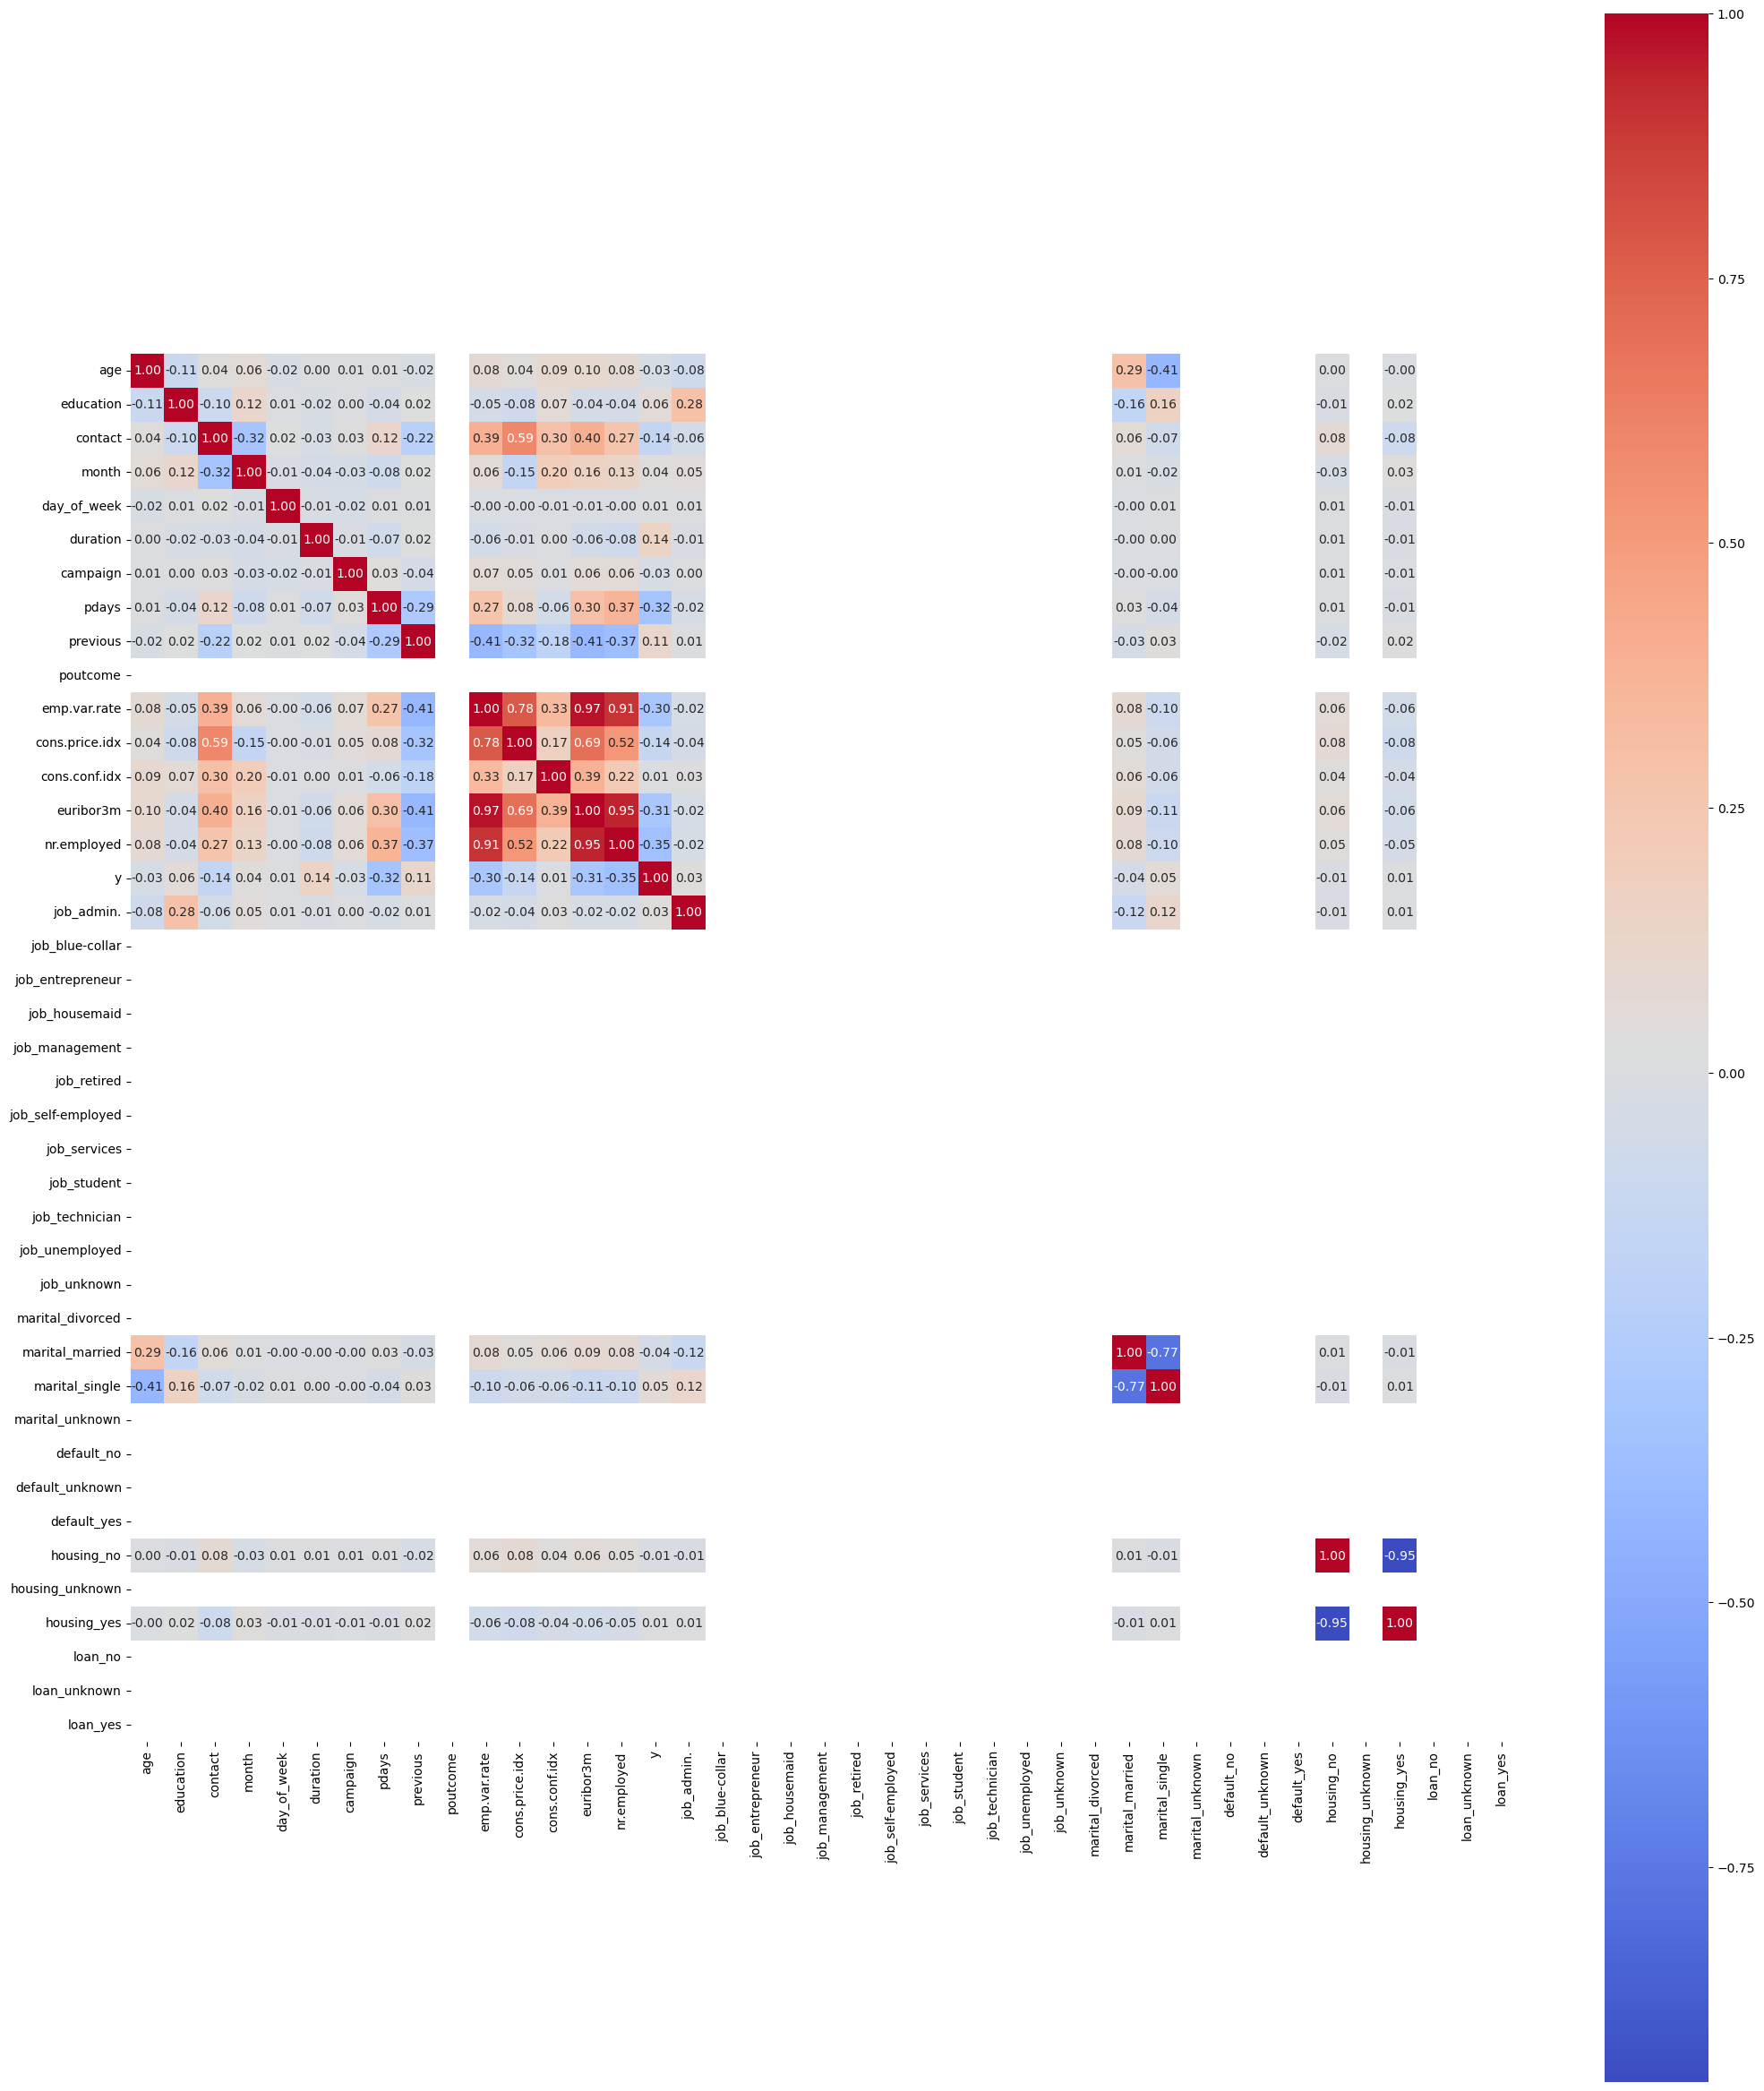

In [35]:
# Here is heatmap of correlation of all features
plt.figure(figsize=(25, 30))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True) # ploting the heat map for checking correlation

* Here hard to understand the correlation in the features.

## Model Selection:

### Scaling
* Now we apply the scaling because the the data has variation.

In [36]:
scaling_data = data[["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]] # saparate the continuous columns 

In [37]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler # importing Scaler for transform the data in the certain range

In [38]:
scaler = MinMaxScaler() # save the MinMaxScaler

In [39]:
scaled_data = scaler.fit_transform(scaling_data) # Apply Min-Max Scaling

In [40]:
scaled_df = pd.DataFrame(scaled_data, columns=scaling_data.columns) # Convert back to a DataFrame

In [41]:
df_new = data.drop(["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"],axis=1) # drop the old columns

In [42]:
scaled_data = pd.concat([df_new,scaled_df],axis=1) # concate the scaled data

In [43]:
# Now we create a X and Y for split the data
X = scaled_data.drop(["y"],axis=1) # define the X
y = scaled_data.y # define the target variable

In [44]:
data.y.value_counts() # check the target variable

y
0    36548
1     4640
Name: count, dtype: int64

* Here we can see the target data is unbalanced so we should use the use the __Over sampling__ method

In [45]:
from imblearn.over_sampling import SMOTE # importing the SMOTE from over sampling method

smote = SMOTE() # save the SMOTE

X_resampled, y_resampled = smote.fit_resample(X, y) # Fit and transform the data

In [46]:
from collections import Counter # for calculate the target variable

In [47]:
print(Counter(y)) # print the actual y variable
print(Counter(y_resampled)) # print the y variable after applying SMOTE

Counter({0: 36548, 1: 4640})
Counter({0: 36548, 1: 36548})


## 6. Modeling
* **Train-Test Split:**
  * Split the dataset into training and testing sets (75/25 split).

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # importint the metrics of classfication

In [49]:
# Here we split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=1)

In [50]:
# we function the model for model evolution
def train_and_evaluate(model):
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # importint the metrics of classfication
    model.fit(X_train, y_train) # Fit the model to the training data
    y_test_predict = model.predict(X_test) # Make predictions on the test data
    y_train_predict = model.predict(X_train) # Make predictions on the train data
    training_accuracy = accuracy_score(y_train, y_train_predict) # Calculate the accuracy for training
    testing_accuracy = accuracy_score(y_test, y_test_predict) # Calculate the accuracy for testing
    print(f"Model: {model.__class__.__name__}") # Print the model's name (class type)
    print(f"Training Accuracy: {training_accuracy:}") # .2f # Print the accuracy formatted to two decimal places
    print(f"Testing Accuracy: {testing_accuracy:}") #.2f # Print the accuracy formatted to two decimal places
    print("Testing Classification Report:\n", classification_report(y_test, y_test_predict)) # Print a detailed classification report
    print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_predict)) # Print the confusion matrix to see the breakdown of predictions
    print("=" * 40) # Print a separator line for better readability

## Model Creation

#### **Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression # importing the Logistic regression Algorithm

In [52]:
log_reg = LogisticRegression() # save the model

In [53]:
log_reg.fit(X_train, y_train)

LogisticRegression()

* **Model Evaluation:**

In [54]:
LR_train_predict = log_reg.predict(X_train) # Prediction for training
LR_test_predict = log_reg.predict(X_test) # Prediction for testing

In [55]:
LR_training_accuracy = accuracy_score(y_train,LR_train_predict) # accuracy for training
LR_testing_accuracy = accuracy_score(y_test,LR_test_predict) # accuracy for testing

In [56]:
train_and_evaluate(log_reg) # evaluate the model

Model: LogisticRegression
Training Accuracy: 0.7638174455510561
Testing Accuracy: 0.7634343876545913
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      9204
           1       0.77      0.75      0.76      9070

    accuracy                           0.76     18274
   macro avg       0.76      0.76      0.76     18274
weighted avg       0.76      0.76      0.76     18274

Testing Confusion Matrix:
 [[7135 2069]
 [2254 6816]]


#### **Support Vector Machine (SVM)**

In [57]:
from sklearn.svm import SVC # Importing the SVM Algorithm

In [58]:
svm = SVC() # save the model

In [59]:
svm.fit(X_train, y_train)

SVC()

* **Model Evaluation:**

In [60]:
SVM_train_predict = svm.predict(X_train) # Prediction for training
SVM_test_predict = svm.predict(X_test) # Prediction for testing

In [61]:
SVM_training_accuracy = accuracy_score(y_train,SVM_train_predict) # accuracy for training
SVM_testing_accuracy = accuracy_score(y_test,SVM_test_predict) # accuracy for testing

In [62]:
train_and_evaluate(svm) # evaluate the model

Model: SVC
Training Accuracy: 0.6391229798256175
Testing Accuracy: 0.646163948779687
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.92      0.72      9204
           1       0.82      0.37      0.51      9070

    accuracy                           0.65     18274
   macro avg       0.71      0.64      0.62     18274
weighted avg       0.71      0.65      0.62     18274

Testing Confusion Matrix:
 [[8453  751]
 [5715 3355]]


#### **Decision Tree**

In [63]:
from sklearn.tree import DecisionTreeClassifier # importing the Decision Tree Algorithm

In [64]:
decision_tree = DecisionTreeClassifier() # save the model

In [65]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

* **Model Evaluation:**

In [66]:
DT_train_predict = decision_tree.predict(X_train) # Prediction for training
DT_test_predict = decision_tree.predict(X_test) # Prediction for testing

In [67]:
DT_training_accuracy = accuracy_score(y_train,DT_train_predict) # accuracy for training
DT_testing_accuracy = accuracy_score(y_test,DT_test_predict) # accuracy for testing

In [68]:
train_and_evaluate(decision_tree) # evaluate the model

Model: DecisionTreeClassifier
Training Accuracy: 0.9999270365911496
Testing Accuracy: 0.9311043011929517
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      9204
           1       0.93      0.94      0.93      9070

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

Testing Confusion Matrix:
 [[8531  673]
 [ 586 8484]]


#### **Random Forest**

In [69]:
from sklearn.ensemble import RandomForestClassifier # importing the Random Forest Algorithm

In [70]:
random_forest = RandomForestClassifier() # save the model

In [71]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

* **Model Evaluation:**

In [72]:
RF_train_predict = random_forest.predict(X_train) # Prediction for training
RF_test_predict = random_forest.predict(X_test) # Prediction for testing

In [73]:
RF_training_accuracy = accuracy_score(y_train,RF_train_predict) # accuracy for training
RF_testing_accuracy = accuracy_score(y_test,RF_test_predict) # accuracy for testing

In [74]:
train_and_evaluate(random_forest) # evaluate the model

Model: RandomForestClassifier
Training Accuracy: 0.9999270365911496
Testing Accuracy: 0.9471927328444785
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      9204
           1       0.95      0.94      0.95      9070

    accuracy                           0.95     18274
   macro avg       0.95      0.95      0.95     18274
weighted avg       0.95      0.95      0.95     18274

Testing Confusion Matrix:
 [[8739  465]
 [ 500 8570]]


#### **K-Nearest Neighbors (KNN)**

In [75]:
from sklearn.neighbors import KNeighborsClassifier # importing the KKN Algorithm

In [76]:
knn = KNeighborsClassifier() # save the model

In [77]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

* **Model Evaluation:**

In [78]:
KNN_train_predict = knn.predict(X_train)  # Prediction for training
KNN_test_predict = knn.predict(X_test)  # Prediction for testing

In [79]:
# Calculate accuracy for training and testing
KNN_training_accuracy = accuracy_score(y_train, KNN_train_predict)  # Accuracy for training
KNN_testing_accuracy = accuracy_score(y_test, KNN_test_predict)  # Accuracy for testing

In [80]:
train_and_evaluate(knn) # evaluate the model

Model: KNeighborsClassifier
Training Accuracy: 0.9272919630805151
Testing Accuracy: 0.9012805078253256
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      9204
           1       0.84      0.99      0.91      9070

    accuracy                           0.90     18274
   macro avg       0.91      0.90      0.90     18274
weighted avg       0.91      0.90      0.90     18274

Testing Confusion Matrix:
 [[7499 1705]
 [  99 8971]]


#### **Naive Bayes**

In [81]:
from sklearn.naive_bayes import BernoulliNB # importing the naive bayes Algorithm

In [82]:
naive_bayes = BernoulliNB() # save the model

In [83]:
naive_bayes.fit(X_train, y_train)

BernoulliNB()

* **Model Evaluation:**

In [84]:
naive_bayes_model_train_predict = naive_bayes.predict(X_train) # Prediction for training
naive_bayes_model_test_predict = naive_bayes.predict(X_test) # Prediction for testing

In [85]:
naive_bayes_training_accuracy = accuracy_score(y_train, naive_bayes_model_train_predict) # accuracy for training
naive_bayes_testing_accuracy = accuracy_score(y_test, naive_bayes_model_test_predict) # accuracy for testing

In [86]:
train_and_evaluate(naive_bayes) # evaluate the model

Model: BernoulliNB
Training Accuracy: 0.7201853270584802
Testing Accuracy: 0.717959943088541
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.71      9204
           1       0.70      0.76      0.73      9070

    accuracy                           0.72     18274
   macro avg       0.72      0.72      0.72     18274
weighted avg       0.72      0.72      0.72     18274

Testing Confusion Matrix:
 [[6183 3021]
 [2133 6937]]


#### **Gradient Boosting**

In [87]:
from sklearn.ensemble import GradientBoostingClassifier # Importing Gradient Boosting Algorithm

In [88]:
GB_model = GradientBoostingClassifier() # save the model

In [89]:
GB_model.fit(X_train, y_train)

GradientBoostingClassifier()

* **Model Evaluation:**

In [90]:
GB_train_predict = GB_model.predict(X_train) # Prediction for training
GB_test_predict = GB_model.predict(X_test) # Prediction for testing

In [91]:
GB_training_accuracy = accuracy_score(y_train,GB_train_predict) # accuracy for training
GB_testing_accuracy = accuracy_score(y_test,GB_test_predict) # accuracy for testing

In [92]:
train_and_evaluate(GB_model) # evaluate the model

Model: GradientBoostingClassifier
Training Accuracy: 0.9319251395425194
Testing Accuracy: 0.9300098500601948
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      9204
           1       0.91      0.95      0.93      9070

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

Testing Confusion Matrix:
 [[8341  863]
 [ 416 8654]]


#### **Ada Boosting**

In [93]:
from sklearn.ensemble import AdaBoostClassifier # Importing Ada Boosting Algorithm

In [94]:
AD_model = AdaBoostClassifier() # save the model

In [95]:
AD_model.fit(X_train, y_train)

AdaBoostClassifier()

* **Model Evaluation:**

In [96]:
AD_train_predict = AD_model.predict(X_train) # Prediction for training
AD_test_predict = AD_model.predict(X_test) # Prediction for testing

In [97]:
AD_training_accuracy = accuracy_score(y_train,AD_train_predict) # accuracy for training
AD_testing_accuracy = accuracy_score(y_test,AD_test_predict) # accuracy for testing

In [98]:
train_and_evaluate(AD_model) # evaluate the model

Model: AdaBoostClassifier
Training Accuracy: 0.9186275582795228
Testing Accuracy: 0.9165481011272847
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      9204
           1       0.91      0.92      0.92      9070

    accuracy                           0.92     18274
   macro avg       0.92      0.92      0.92     18274
weighted avg       0.92      0.92      0.92     18274

Testing Confusion Matrix:
 [[8420  784]
 [ 741 8329]]


#### **Xtreme Gradient Boosting**

In [99]:
from xgboost import XGBClassifier # Importing Xtreme Gradient Boosting Algorithm

In [100]:
XGB_model = XGBClassifier() # save the model

In [101]:
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

* **Model Evaluation:**

In [102]:
XGB_train_predict = XGB_model.predict(X_train) # Prediction for training
XGB_test_predict = XGB_model.predict(X_test) # Prediction for testing

In [103]:
XGB_training_accuracy = accuracy_score(y_train,XGB_train_predict) # accuracy for training
XGB_testing_accuracy = accuracy_score(y_test,XGB_test_predict) # accuracy for testing

In [104]:
train_and_evaluate(XGB_model) # evaluate the model

Model: XGBClassifier
Training Accuracy: 0.96561599357922
Testing Accuracy: 0.943471598993105
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      9204
           1       0.94      0.95      0.94      9070

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

Testing Confusion Matrix:
 [[8614  590]
 [ 443 8627]]


#### 7. Hyperparameter Tuning
* **Applying Hyperparameter tuning on Xtreme Gradient Boosting:**

In [106]:
# Importing RandomizedSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Define parameters grid for gamma, learning_Rate, max_depth, n_estimator, reg_alpha, reg_lamdba
param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}


rcv= GridSearchCV(estimator=XGB_model, scoring='accuracy',refit=True,param_grid=param_grid,  cv=3, 
                               verbose=1, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train,y_train)##training data on randomsearch cv
 
print(f"Best paramters: {rcv.best_params_})")##printing  best parameters

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
Best paramters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 80, 'reg_alpha': 0.2, 'reg_lambda': 0})


In [107]:
# save the model after Hyperparameter tuning
XGB_Model_aft_HYPT = rcv.best_estimator_

In [108]:
XGB_Model_aft_HYPT.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [109]:
XGB_HYPT_train_predict = XGB_model.predict(X_train) # Prediction for training
XGB_HYPT_test_predict = XGB_model.predict(X_test) # Prediction for testing

In [110]:
XGB_HYPT_training_accuracy = accuracy_score(y_train,XGB_HYPT_train_predict) # accuracy for training
XGB_HYPT_testing_accuracy = accuracy_score(y_test,XGB_HYPT_test_predict) # accuracy for testing

In [111]:
train_and_evaluate(XGB_Model_aft_HYPT) # evaluate the model

Model: XGBClassifier
Training Accuracy: 0.9698296304403342
Testing Accuracy: 0.9445660501258619
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      9204
           1       0.94      0.95      0.94      9070

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

Testing Confusion Matrix:
 [[8604  600]
 [ 413 8657]]


#### **Bagging Algorithm**

In [112]:
from sklearn.ensemble import BaggingClassifier # importing Bagging Algorithm

In [113]:
BG = BaggingClassifier() # save the model

In [114]:
BG.fit(X_train, y_train)

BaggingClassifier()

* **Model Evaluation:**

In [115]:
BG_train_predict = BG.predict(X_train) # Prediction for training
BG_test_predict = BG.predict(X_test) # Prediction for testing

In [116]:
BG_training_accuracy = accuracy_score(y_train,BG_train_predict) # accuracy for training
BG_testing_accuracy = accuracy_score(y_test,BG_test_predict) # accuracy for testing

In [117]:
train_and_evaluate(BG) # evaluate the model

Model: BaggingClassifier
Training Accuracy: 0.9968443325672175
Testing Accuracy: 0.9439093794462077
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      9204
           1       0.95      0.94      0.94      9070

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

Testing Confusion Matrix:
 [[8714  490]
 [ 535 8535]]


#### **Artificial Neural Network (ANN)**

In [118]:
from sklearn.neural_network import MLPClassifier # importing Artificial Neural Network (ANN) algorithm

In [119]:
MLP_model = MLPClassifier() # save the model

In [120]:
MLP_model.fit(X_train, y_train)

MLPClassifier()

* **Model Evaluation:**

In [121]:
MLP_train_predict = MLP_model.predict(X_train) # Prediction for training
MLP_test_predict = MLP_model.predict(X_test) # Prediction for testing

In [122]:
MLP_training_accuracy = accuracy_score(y_train,MLP_train_predict) # accuracy for training
MLP_testing_accuracy = accuracy_score(y_test,MLP_test_predict) # accuracy for testing

In [123]:
train_and_evaluate(MLP_model) # evaluate the model

Model: MLPClassifier
Training Accuracy: 0.8593995111451607
Testing Accuracy: 0.857776075298238
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      9204
           1       0.93      0.77      0.84      9070

    accuracy                           0.86     18274
   macro avg       0.87      0.86      0.86     18274
weighted avg       0.87      0.86      0.86     18274

Testing Confusion Matrix:
 [[8682  522]
 [2077 6993]]


### Model Comparsion Report

In [124]:
# Save the all models accuracy in a dataframe
Model_performance = pd.DataFrame({"Model":["Logistic Regression","Support Vector Machine (SVM)","Decision Tree","Random Forest",
                                           "K-Nearest Neighbors (KNN)","Naive Bayes","Gradient Boosting","Ada Boosting",
                                           "Xtreme Gradient Boosting","Bagging Algorithm","Artificial Neural Network (ANN)"],
                                  "Accuracy":[LR_testing_accuracy*100,SVM_testing_accuracy*100,DT_testing_accuracy*100,RF_testing_accuracy*100,
                                              KNN_testing_accuracy*100,naive_bayes_testing_accuracy*100,GB_testing_accuracy*100,AD_testing_accuracy*100,
                                              XGB_HYPT_testing_accuracy*100,BG_testing_accuracy*100,MLP_testing_accuracy*100]})

In [125]:
Model_performance

,Model,Accuracy
0,Logistic Regression,76.343439
1,Support Vector Machine (SVM),64.616395
2,Decision Tree,93.033819
3,Random Forest,94.620773
4,K-Nearest Neighbors (KNN),90.128051
5,Naive Bayes,71.795994
6,Gradient Boosting,93.000985
7,Ada Boosting,91.654810
8,Xtreme Gradient Boosting,94.347160
9,Bagging Algorithm,94.467550


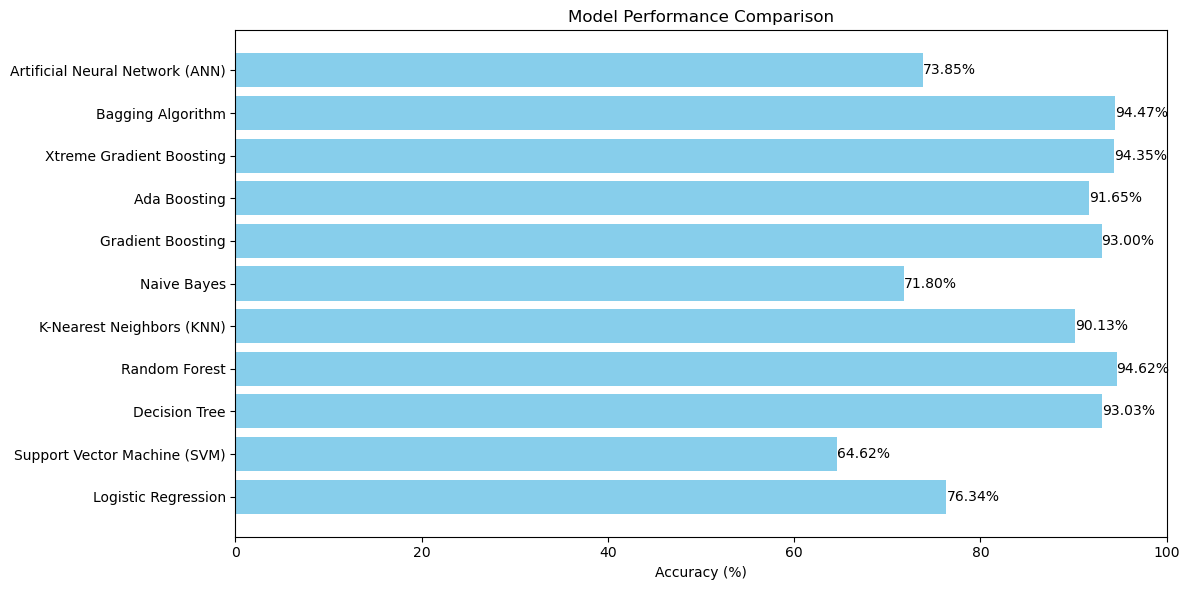

In [126]:
plt.figure(figsize=(12, 6)) # Set the figure size
plt.barh(Model_performance['Model'], Model_performance['Accuracy'], color='skyblue') # Create the bar plot

# Add labels and title
plt.xlabel('Accuracy (%)')
plt.title('Model Performance Comparison') # add title
plt.xlim(0, 100)  # Set x-axis limits to 0-100%

# Add value annotations on bars
for index, value in enumerate(Model_performance['Accuracy']):
    plt.text(value, index, f"{value:.2f}%", va='center')

plt.tight_layout()  # Adjust layout
plt.show() # Show the plot

## 9. Deployment Considerations

##### **Based on accuracy report, here are some key conclusions:**

* **Top Performers:**

* The **Random Forest** model achieved the highest accuracy at 94.71%, closely followed by Xtreme Gradient Boosting at 94.20% and the Bagging Algorithm at 93.62%. These models demonstrate strong performance and could be considered the best options for this classification task.
Solid Alternatives:

* **Gradient Boosting and Decision Tree models** also performed well, with accuracies of 91.88% and 91.87%, respectively. They could serve as viable alternatives if interpretability or training speed is a concern, as decision trees are typically easier to interpret than ensemble methods.
Moderate Performers:

* **The K-Nearest Neighbors (KNN) and Artificial Neural Network (ANN)** models provided decent results, with accuracies of 86.48% and 87.61%. These models may still be useful, especially if the context of the application allows for slightly lower accuracy.
Underperformers:

* **The Logistic Regression and Naive Bayes** models had the lowest accuracy, at 73.38% and 71.57%, respectively. These models may not be suitable for this dataset, given their performance.
Considerations for Deployment:

* While accuracy is a crucial metric, consider other factors such as model complexity, training time, and interpretability before finalizing a model for deployment. **The best-performing models (Random Forest, XGBoost, and Bagging).**

#### __Challenges Faced__


* **Model Selection:**

* Deciding which algorithms to implement was challenging, especially with so many options available. Each model has its strengths and weaknesses, making it difficult to determine the best fit for the dataset.

* **Hyperparameter Tuning:**

* Fine-tuning the hyperparameters for model XGBoost required significant time and effort. Finding the right balance for parameters was essential to improve model performance.

* **Data Quality:**

* Ensuring the quality and cleanliness of the dataset was a challenge. Missing values, outliers, or irrelevant features could significantly impact model accuracy, requiring extensive preprocessing.

* **Overfitting**
* The model was going in overfitting problems.

## **Model dump**

* **Here we save the final model for future use**

In [127]:
import pickle # use for save the model

In [128]:
with open("Portuguese Bank.pkl","wb") as f:  # save model
    pickle.dump(XGB_Model_aft_HYPT,f) # save random_forest model

In [129]:
with open("Portuguese Bank.pkl","rb") as f: # load the model
    Model_new = pickle.load(f) # save as Mdel_new the file for prediction

In [130]:
X_array = np.array(X) # for easy to prediction we save the X in array form

In [131]:
X_array[0] # see the first row of X

array([5.60000000e+01, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00,
       0.00000000e+00, 2.61000000e+02, 1.00000000e+00, 9.99000000e+02,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.37500000e-01,
       6.98752923e-01, 6.95652174e-01, 9.57379279e-01, 8.59735350e-01])

In [132]:
# Predict by the saved model
Model_new.predict([[0.75      , 0.14285714, 1.        , 0.22222222, 0.        ,
       0.4052795 , 0.        , 1.        , 0.        , 0.        ,
       0.9375    , 0.69875292, 0.69565217, 0.95737928, 0.85973535,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ]])

array([0])

In [133]:
y.head(1) # see the first output

0    0
Name: y, dtype: int32

# Thank You......